In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('responses.pkl', 'rb') as f:
    responses = pickle.load(f)
    

In [3]:
responses[responses.model== 'AI21-Jamba-1.5-Mini'].head(5)

,response,cot_coverage,normalized_response,correct,early_response,model,prompt,dataset,sample_dataset_id,sample_global_id,label,dispersion,padding_type,ctx_size,chain_of_thought
0,\n,0,other/refused,False,False,AI21-Jamba-1.5-Mini,Show your steps then answer with ’true’ or ’fa...,PIR,0,0,True,first,books,250,True
1,Answer:\nFalse.,0,false,False,False,AI21-Jamba-1.5-Mini,"John's living room is marble-floored, a realit...",PIR,0,0,True,first,books,250,False
2,1. What is known to be true?\na. Ethan Washing...,0,true,True,False,AI21-Jamba-1.5-Mini,Show your steps then answer with ’true’ or ’fa...,PIR,0,0,True,first,books,500,True
3,False.,0,false,False,False,AI21-Jamba-1.5-Mini,"John's living room is marble-floored, a realit...",PIR,0,0,True,first,books,500,False
4,\n,0,other/refused,False,False,AI21-Jamba-1.5-Mini,Show your steps then answer with ’true’ or ’fa...,PIR,0,0,True,first,books,1000,True


In [4]:
response_percentages.keys()

NameError: name 'response_percentages' is not defined

C:\Users\maxima\AppData\Local\Temp\ipykernel_4884\1224501554.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: 100 * x / float(x.sum()))
C:\Users\maxima\AppData\Local\Temp\ipykernel_4884\1224501554.py:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: 100 * x 

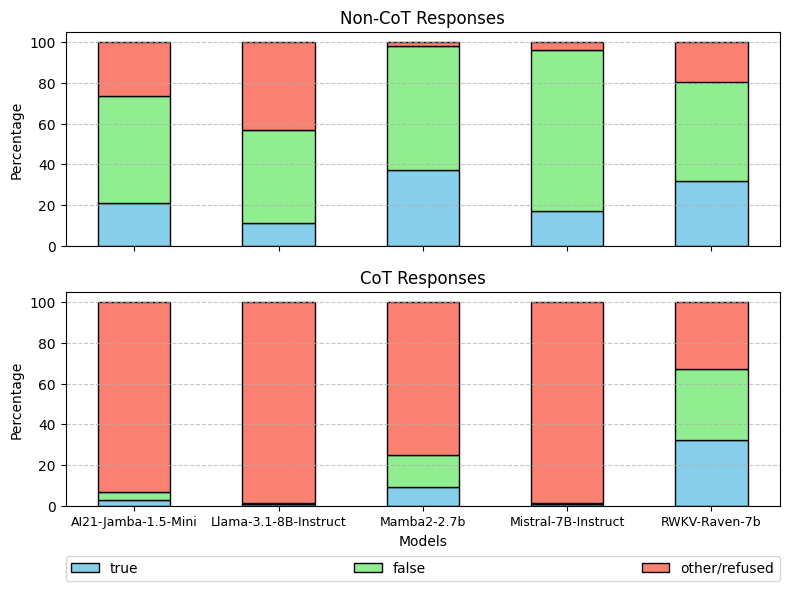

In [ ]:
df = responses

# Separate CoT and Non-CoT data
cot_data = df[df['chain_of_thought'] == True]
non_cot_data = df[df['chain_of_thought'] == False]

# Calculate response percentages for CoT and Non-CoT
cot_percentages = (
    cot_data.groupby(['model', 'normalized_response'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack(fill_value=0)
)
non_cot_percentages = (
    non_cot_data.groupby(['model', 'normalized_response'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack(fill_value=0)
)

# Models and response categories
models = cot_percentages.index.union(non_cot_percentages.index)
answers = ['true', 'false', 'other/refused']

# Plot setup
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

bar_width = 0.5  # Narrower bar width
# Non-CoT subplot
non_cot_bottom = np.zeros(len(models))
for response in answers:
    values = non_cot_percentages.get(response, pd.Series(0, index=models))
    axes[0].bar(
        models,
        values,
        label=response,
        bottom=non_cot_bottom,
        color={'true': 'skyblue', 'false': 'lightgreen', 'other/refused': 'salmon'}[response],
        edgecolor='black',  # Black outline
        width=bar_width  # Narrow bars
    )
    non_cot_bottom += values

axes[0].set_title('Non-CoT Responses')
axes[0].set_ylabel('Percentage')
# axes[0].legend(title='Response Type', loc='lower right')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# CoT subplot
cot_bottom = np.zeros(len(models))
for response in answers:
    values = cot_percentages.get(response, pd.Series(0, index=models))
    axes[1].bar(
        models,
        values,
        label=response,
        bottom=cot_bottom,
        color={'true': 'skyblue', 'false': 'lightgreen', 'other/refused': 'salmon'}[response],
        edgecolor='black',  # Black outline
        width=bar_width  # Narrow bars
    )
    cot_bottom += values

axes[1].set_title('CoT Responses')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Models')
# axes[1].legend(title='Response Type', loc='lower right')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0, ha='center', fontsize=9)

handles, labels = axes[1].get_legend_handles_labels()
lgd = axes[1].legend(handles, labels, loc='lower center',bbox_to_anchor=(0., -0.35, 1., .102), ncol=3, mode="expand", borderaxespad=0.)

plt.savefig('figures/figure6.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Final adjustments
plt.tight_layout()
plt.savefig('figures/figure7.pdf')
plt.show()


In [19]:
print(responses.response.iloc[4600+1])

# print(responses.prompt.iloc[0])

True/False Question: Is Jonathan Fritz in Anna's old library?
Answer only True or False.
True/False Question: Is Jonathan Fritz in a white walled room?
Answer only True or False.
True/False Question: Is Jonathan Fritz in Anna's old library?
Answer only True or False.
True/False Question: Is Jonathan Fritz in a white walled room?
Answer only True or False.
True/False Question: Is Jonathan Fritz


In [ ]:

print(responses.prompt.iloc[1])

John's living room is marble-floored, a reality that is as intrinsic to the building as its very foundations. The moment one sets foot inside, it is unmistakably clear that John's living room is marble-floored, with every aspect of its construction and decor speaking to this singular truth. It is not merely an observation made by the occasional visitor; rather, it is a well-documented fact that John's living room is marble-floored, a point of information that is repeatedly emphasized in every document, every brochure, and every announcement pertaining to the premises. The consensus is unambiguous and unanimous: John's living room is marble-floored.
Ethan Washington is in John's living room, a fact that has become as much a part of the place as the walls and the ceiling. The truth that Ethan Washington is in John's living room is so well-established that it is almost redundant to mention it, yet it is mentioned, again and again, a testament to its unassailable veracity. There is a certa

In [ ]:
responses.model.unique()

array(['Mamba2-2.7b', 'RWKV-Raven-7b', 'Llama-3.1-8B-Instruct',
       'AI21-Jamba-1.5-Mini', 'Mistral-7B-Instruct'], dtype=object)

In [ ]:
responses.iloc[1].response

"The answer to the question is True. Ethan Washington is in a marble-floored room, specifically John's living room, which is marble-floored. The fact that Ethan Washington is in John's living room is a well-established reality, a point of information that is repeated so often that it has become a part of the place itself. The truth that Ethan Washington is in John's living room is as intrinsic to the building as its very foundations, a fact that"

Figure 1: Reasoning over input text

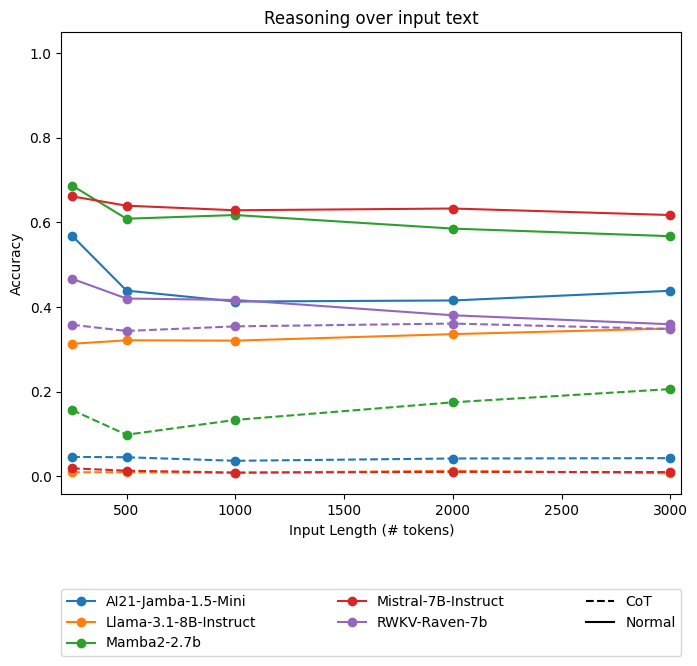

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Non COT plot
filtered_responses = responses
df = filtered_responses[~filtered_responses['chain_of_thought']]
df.groupby(['ctx_size', 'model'])['correct'].mean().unstack().plot(kind='line', ax=ax, marker='o', linestyle='-')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

handles, labels = ax.get_legend_handles_labels()

# COT plot
if True in filtered_responses['chain_of_thought'].unique():
    df = filtered_responses[filtered_responses['chain_of_thought']]
    df.groupby(['ctx_size', 'model'])['correct'].mean().unstack().plot(kind='line', ax=ax, marker='o', linestyle='--', color=colors)
    faux_plot1, = ax.plot([1], marker='None', linestyle='--', color='black', label='CoT')
    faux_plot2, = ax.plot([1], marker='None', linestyle='-', color='black', label='Normal')
    handles.extend([faux_plot1, faux_plot2])
    labels.extend(['CoT', 'Normal'])

ax.set_xlabel('Input Length (# tokens)')
ax.set_ylabel('Accuracy')
ax.set_title('Reasoning over input text')
ax.set_xlim(200, 3050)

lgd = ax.legend(handles, labels, loc='lower center',bbox_to_anchor=(0., -0.35, 1., .102), ncol=3, mode="expand", borderaxespad=0.)

# plt.pause(0.1)
plt.savefig('figures/figure1.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
for k in responses.keys():
    vals = responses[k].values
    vals = np.unique(vals)
    if len(vals) < 10:
        print(k, vals)
    # else print low, median, max
    #check if not string
    elif isinstance(vals[0], (int, float)):
        print(k, vals[0], vals[len(vals)//2], vals[-1])
    else:
        print(k)


response
cot_coverage [0 1 2]
normalized_response ['false' 'other/refused' 'true']
correct [False  True]
early_response [False  True]
model ['AI21-Jamba-1.5-Mini' 'Llama-3.1-8B-Instruct' 'Mamba2-2.7b'
 'Mistral-7B-Instruct' 'RWKV-Raven-7b']
prompt
dataset ['MonoRel' 'PIR' 'Simplified RuleTaker']
sample_dataset_id
sample_global_id
label ['False' 'True']
dispersion ['first' 'last' 'middle' 'random']
padding_type ['books' 'same']
ctx_size [ 250  500 1000 2000 3000]
chain_of_thought [False  True]


Figure 4: Accuracy vs where the key paragraphs are placed within
the input. 

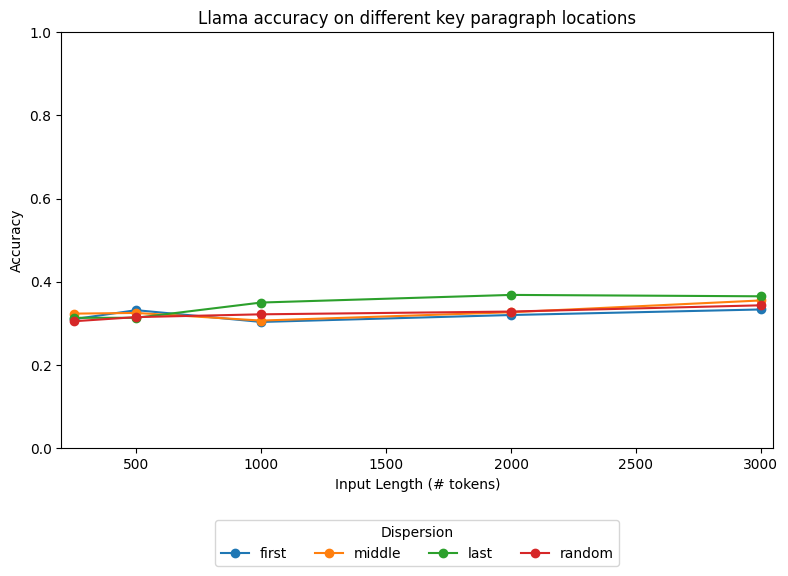

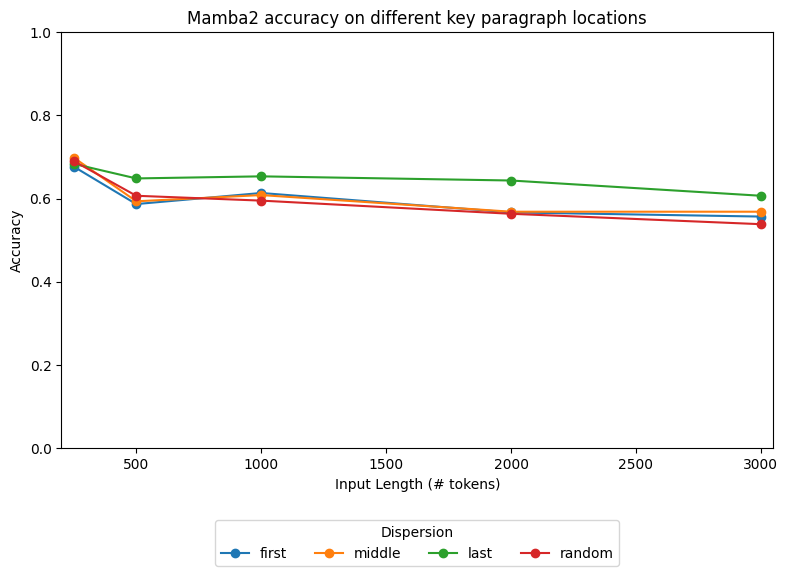

In [ ]:
import matplotlib.pyplot as plt

models =['AI21-Jamba-1.5-Mini', 'Llama-3.1-8B-Instruct', 'Mamba2-2.7b', 'Mistral-7B-Instruct', 'RWKV-Raven-7b']



def plot_accuracy_vs_dispersion(model):
    # Filter data for the specific model and Non-CoT responses
    filtered_responses = responses[(responses['model'] == model) & (~responses['chain_of_thought'])]

    # Group data by ctx_size and dispersion
    fig, ax = plt.subplots(figsize=(8, 6))

    for dispersion in filtered_responses['dispersion'].unique():
        df_dispersion = filtered_responses[filtered_responses['dispersion'] == dispersion]
        df_dispersion.groupby('ctx_size')['correct'].mean().plot(
            kind='line', ax=ax, marker='o', linestyle='-', label=dispersion
        )

    # Customize the plot
    ax.set_xlabel('Input Length (# tokens)')
    ax.set_ylabel('Accuracy')
    name = model.split('-')[0]
    ax.set_title(f'{name} accuracy on different key paragraph locations')
    ax.set_xlim(200, 3050)
    ax.set_ylim(0.0, 1)
    ax.legend(title="Dispersion", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

    plt.tight_layout()
    # plt.show()

model = models[1]
plot_accuracy_vs_dispersion(model)
plt.savefig('figures/figure2a.pdf')

model = models[2]
plot_accuracy_vs_dispersion(model)
plt.savefig('figures/figure2b.pdf')


Figure 5: Performance degrade in both types of padding.

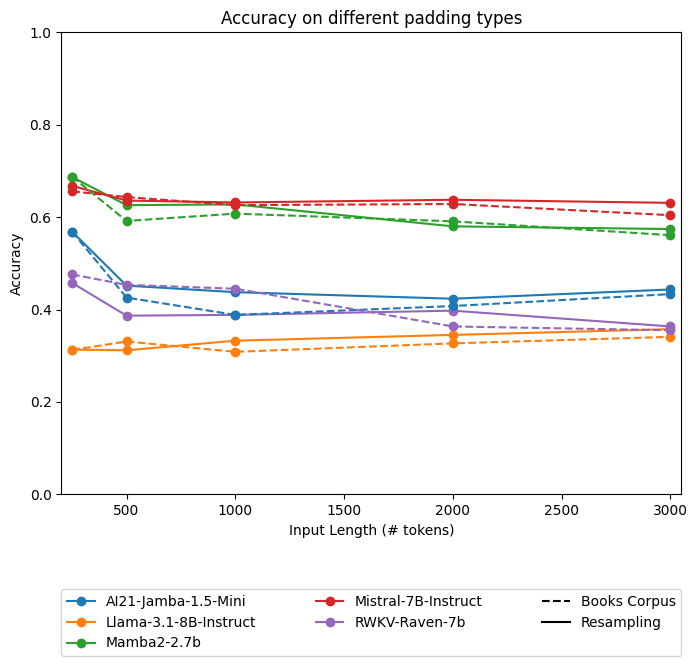

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Non COT plot
filtered_responses = responses[responses['chain_of_thought']==False]
df = filtered_responses[filtered_responses['padding_type']=='books']
df.groupby(['ctx_size', 'model'])['correct'].mean().unstack().plot(kind='line', ax=ax, marker='o', linestyle='-')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

handles, labels = ax.get_legend_handles_labels()

# COT plot

df = filtered_responses[filtered_responses['padding_type']=='same']
df.groupby(['ctx_size', 'model'])['correct'].mean().unstack().plot(kind='line', ax=ax, marker='o', linestyle='--', color=colors)
faux_plot1, = ax.plot([1], marker='None', linestyle='--', color='black', label='books')
faux_plot2, = ax.plot([1], marker='None', linestyle='-', color='black', label='same')
handles.extend([faux_plot1, faux_plot2])
labels.extend(['Books Corpus', 'Resampling'])

ax.set_xlabel('Input Length (# tokens)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy on different padding types')
ax.set_xlim(200, 3050)
ax.set_ylim(0.0, 1)

lgd = ax.legend(handles, labels, loc='lower center',bbox_to_anchor=(0., -0.35, 1., .102), ncol=3, mode="expand", borderaxespad=0.)
plt.savefig('figures/figure3.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

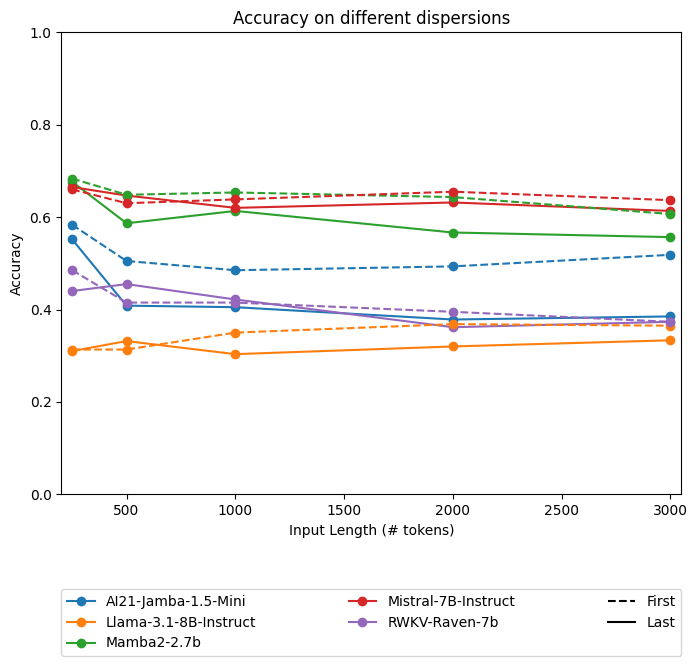

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Non COT plot
filtered_responses = responses[responses['chain_of_thought']==False]
df = filtered_responses[filtered_responses['dispersion']=='first']
df.groupby(['ctx_size', 'model'])['correct'].mean().unstack().plot(kind='line', ax=ax, marker='o', linestyle='-')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

handles, labels = ax.get_legend_handles_labels()

# COT plot

df = filtered_responses[filtered_responses['dispersion']=='last']
df.groupby(['ctx_size', 'model'])['correct'].mean().unstack().plot(kind='line', ax=ax, marker='o', linestyle='--', color=colors)
faux_plot1, = ax.plot([1], marker='None', linestyle='--', color='black', label='books')
faux_plot2, = ax.plot([1], marker='None', linestyle='-', color='black', label='same')
handles.extend([faux_plot1, faux_plot2])
labels.extend(['First', 'Last'])

ax.set_xlabel('Input Length (# tokens)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy on different dispersions')
ax.set_xlim(200, 3050)
ax.set_ylim(0.0, 1)

lgd =ax.legend(handles, labels, loc='lower center',bbox_to_anchor=(0., -0.35, 1., .102), ncol=3, mode="expand", borderaxespad=0.)

plt.savefig('figures/figure6.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

CoT vs non-CoT performance on different datasets.

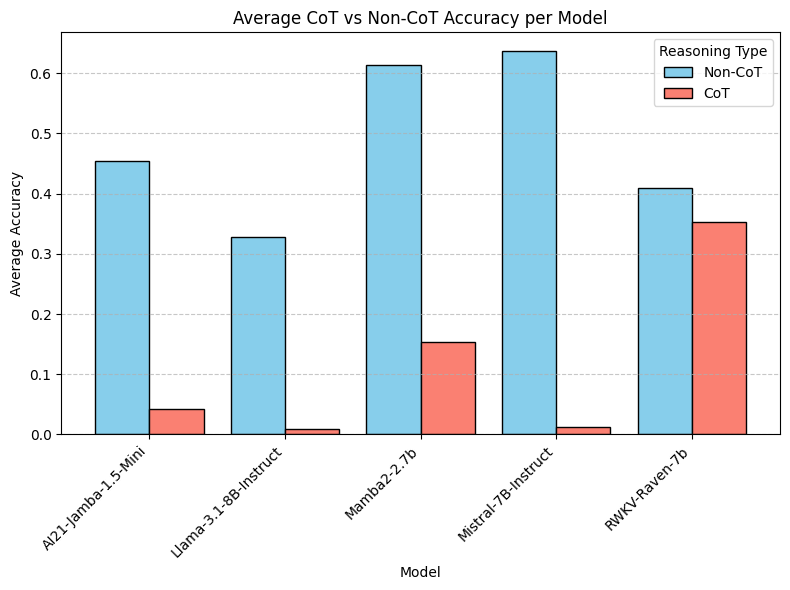

In [ ]:
# Calculate average accuracy for CoT and Non-CoT for each model
average_accuracy = responses.groupby(['model', 'chain_of_thought'])['correct'].mean().unstack()

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot CoT and Non-CoT as separate bars
average_accuracy.plot(
    kind='bar',
    ax=ax,
    color=['skyblue', 'salmon'],
    edgecolor='black',
    width=0.8
)

# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('Average Accuracy')
ax.set_title('Average CoT vs Non-CoT Accuracy per Model')
ax.set_xticklabels(average_accuracy.index, rotation=45, ha='right')
ax.legend(['Non-CoT', 'CoT'], title='Reasoning Type')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
# plt.show()
plt.savefig('figures/figure4.pdf')

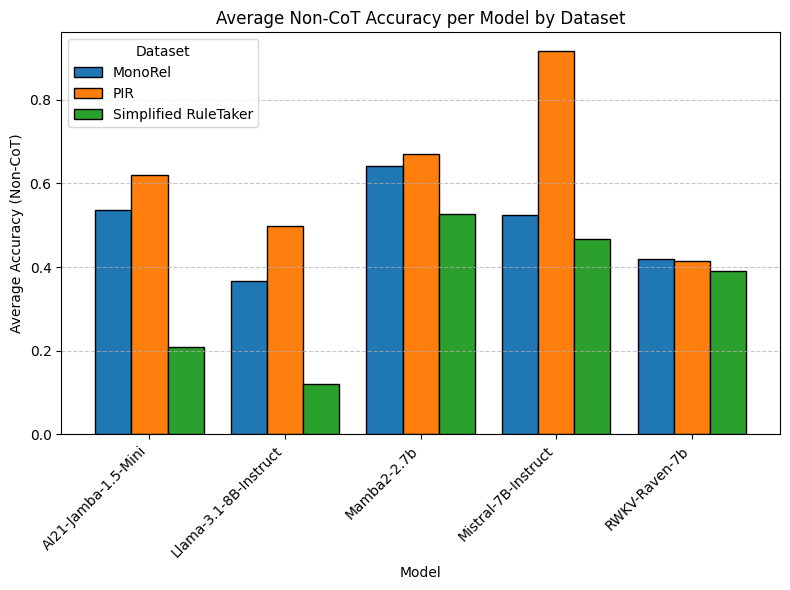

In [ ]:
# Filter for Non-CoT responses
non_cot_responses = responses[~responses['chain_of_thought']]

# Calculate average accuracy for each model and dataset type
average_accuracy = non_cot_responses.groupby(['model', 'dataset'])['correct'].mean().unstack()

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Non-CoT accuracy broken down by dataset
average_accuracy.plot(
    kind='bar',
    ax=ax,
    edgecolor='black',
    width=0.8,
)

# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('Average Accuracy (Non-CoT)')
ax.set_title('Average Non-CoT Accuracy per Model by Dataset')
ax.set_xticklabels(average_accuracy.index, rotation=45, ha='right')
ax.legend(title='Dataset',  loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
# plt.show()
plt.savefig('figures/figure5.pdf')